## imports

In [63]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## dataset creation

In [64]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

## Plotting

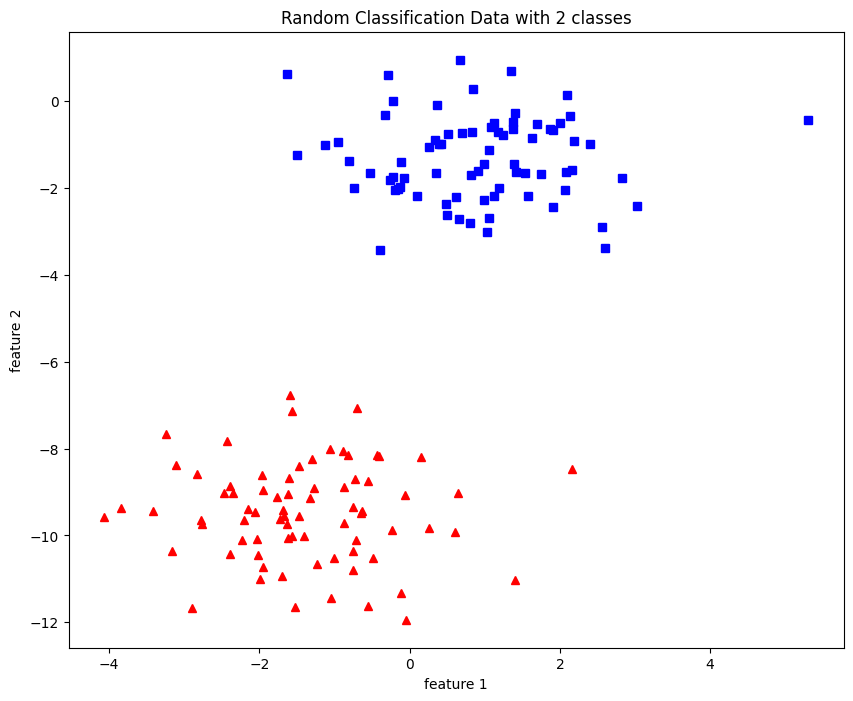

In [65]:
def plotting(X,y):
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Random Classification Data with 2 classes')
    
plotting(X,y)

## Activation function

In [66]:
def acti_func(z):
    return int(z > 0)

## perceptron algorithm

In [67]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n + 1, 1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                # Incrementing by 1.
                w = w + lr * (y[idx] - np.squeeze(y_hat)) * x_i
                n_miss += 1
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)

    return w, n_miss_list


w, n_miss_list = perceptron(X, y, 0.01, 5)

C:\Users\firas\AppData\Local\Temp\ipykernel_15436\53671201.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(z > 0)


## plot decision boundary

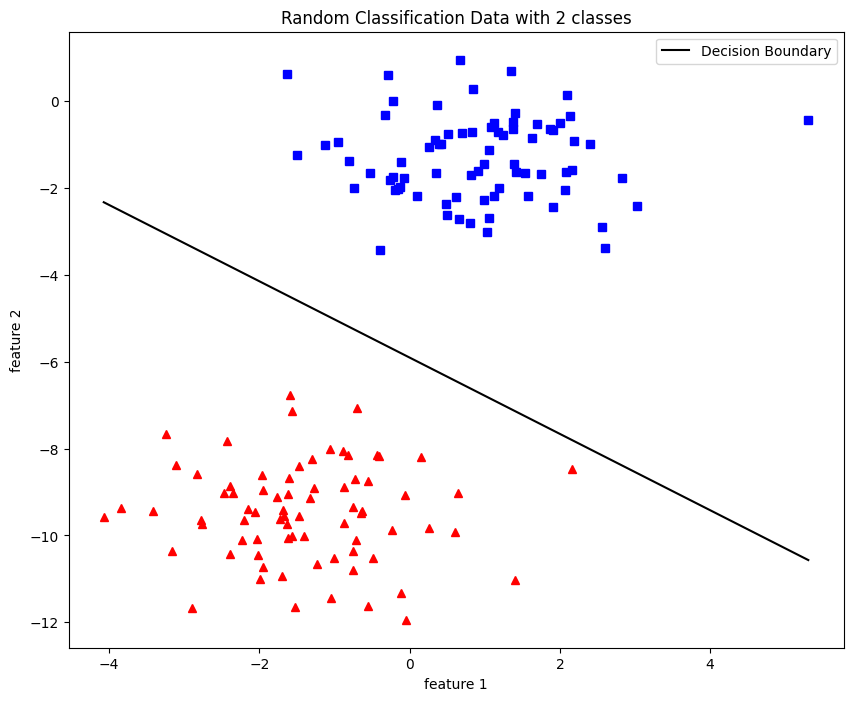

In [68]:
def plot_decision_boundary(X,y, w):
    
    plotting(X,y)

    # Extracting slope and intercept from weights
    w0, w1, w2 = w
    m = -w1 / w2
    c = -w0 / w2

    # Calculating x2 values for the decision boundary line
    x1 = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    x2 = m * x1 + c

    plt.plot(x1, x2, color='k', label='Decision Boundary')
    plt.legend()
    plt.show()
    
plot_decision_boundary(X,y,w)

# Ex 2

## dataset generation :

In [69]:
from sklearn.model_selection import train_test_split


#  i need a dataset of 250 (X,Y) that has 125 classified as -1 distributed normally as N([-1,0],σ1^2)
#  and 125 classified as 0 distributed normally as N([1,0],σ2^2)
# σ1^2 = σ2^2 = 0.25


def gen_dataset(sigma1 , sigma2):
    dataset = []

    s1 = sigma1
    s2 = sigma2
    y1 = 1
    y2 = 0
    mu1 = [-1, 0]
    mu2 = [1, 0]

    x1 = np.random.normal(mu1, s1, size=(125, 2))
    x2 = np.random.normal(mu2, s2, size=(125, 2))

    # concat x1 x2
    X = np.concatenate((x1, x2), axis=0)
    y = np.array([y1 for i in range(0, 125)] + [y2 for i in range(0, 125)])
    return X,y
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #     
    # return X_train, X_test, y_train, y_test

# gen_dataset(0.25)


## Accuracy calculation function :

In [70]:
# calculate accuracy
def accuracy(X_test, y_test, w):
    m, n = X_test.shape
    n_correct = 0
    for idx, x_i in enumerate(X_test):
        x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
        y_hat = acti_func(np.dot(x_i.T, w))
        if (np.squeeze(y_hat) - y_test[idx]) == 0:
            n_correct += 1
    return n_correct / m

## Experience 1

C:\Users\firas\AppData\Local\Temp\ipykernel_15436\53671201.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(z > 0)


1.0


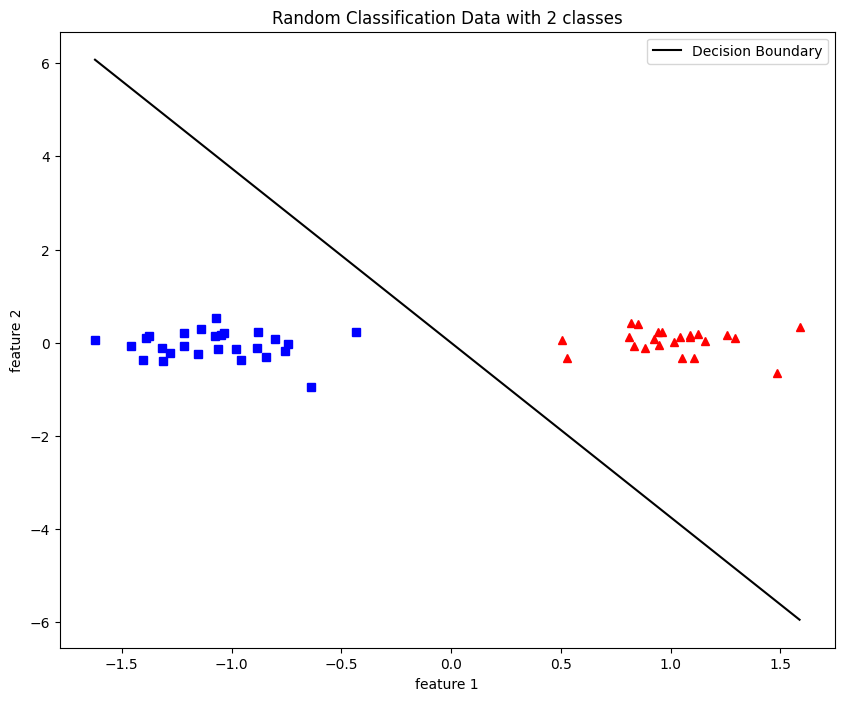

In [71]:
X,y = gen_dataset(0.25 , 0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w,n_miss_list = perceptron(X_train , y_train , 0.1,5)

print(accuracy(X_test, y_test, w))

plot_decision_boundary(X_test,y_test,w)

## Experience 2

C:\Users\firas\AppData\Local\Temp\ipykernel_15436\53671201.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(z > 0)


0.8


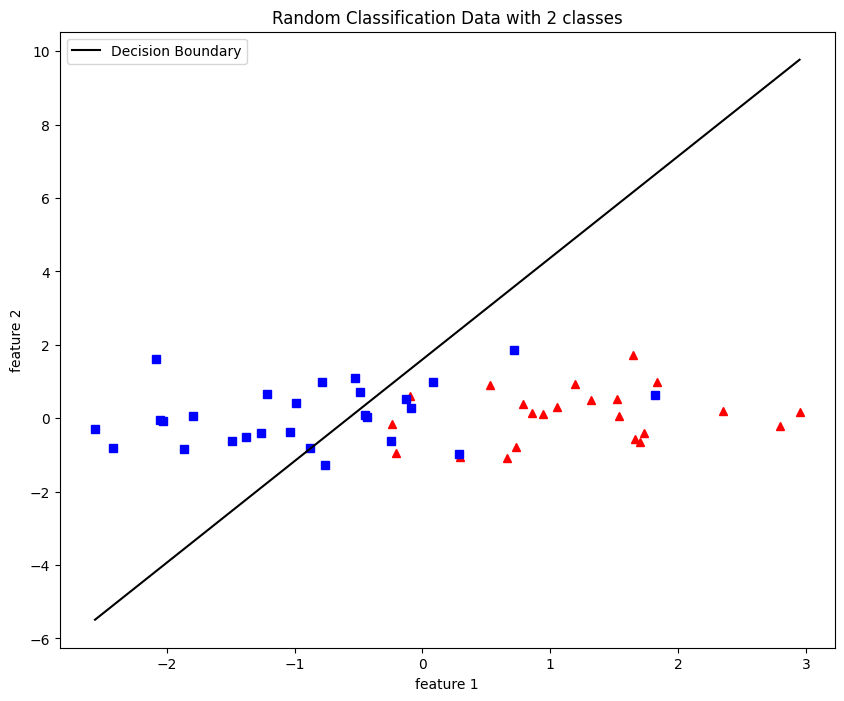

In [72]:
X,y = gen_dataset(0.75 , 0.75)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w,n_miss_list = perceptron(X_train , y_train , 0.1,5)

print(accuracy(X_test, y_test, w))

plot_decision_boundary(X_test,y_test,w)

## Experience 3 :

## error calculator function :

C:\Users\firas\AppData\Local\Temp\ipykernel_15436\53671201.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(z > 0)


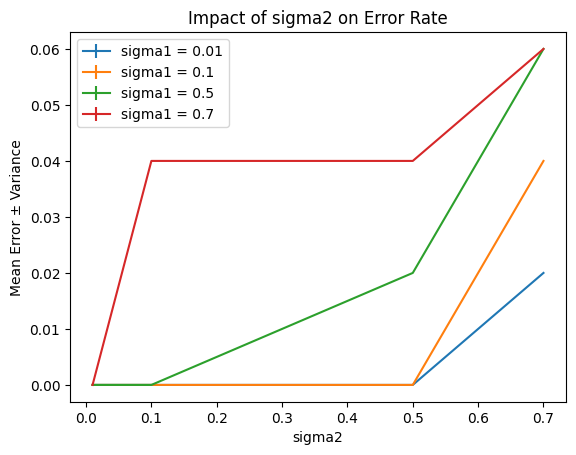

In [73]:
from sklearn.linear_model import LogisticRegression

sigma_values = [0.01, 0.1, 0.5, 0.7]

# Initialize empty arrays to store errors
mean_errors = np.zeros((len(sigma_values), len(sigma_values)))
var_errors = np.zeros((len(sigma_values), len(sigma_values)))

# Repeat the experiment for different sigma values
for i, sigma1 in enumerate(sigma_values):
    for j, sigma2 in enumerate(sigma_values):
        # Generate data for current sigma values
        X,y = gen_dataset(sigma1, sigma2)
        X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        # Train a logistic regression model
        w , n_miss_list = perceptron(X_train , y_train , 0.01,10)

        # Calculate error on the test set
        error = 1 - accuracy(X_test, y_test, w)

        # Store error for current sigma values
        mean_errors[i, j] = error
        var_errors[i, j] = np.var(error)

# Plot the results using errorbar
plt.figure()
for i, sigma1 in enumerate(sigma_values):
    plt.errorbar(sigma_values, mean_errors[i], yerr=var_errors[i], label=f"sigma1 = {sigma1}")

plt.xlabel("sigma2")
plt.ylabel("Mean Error ± Variance")
plt.title("Impact of sigma2 on Error Rate")
plt.legend()
plt.show()